In [87]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
def show_results(folder_path):
    rows = folder_path[-3]
    cols = folder_path[-1]

    def show_arriving():
        #Show # arriving cars
        non_mem = np.mean(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)
        non_mem_std = np.std(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)

        mem = np.mean(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)
        mem_std = np.std(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)

        mem_comm = np.mean(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)
        mem_comm_std = np.std(np.load(f'{folder_path}/total_arriving_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)

        plt.plot(non_mem, label = 'Non Memory')
        plt.fill_between(x = range(len(non_mem)), y1 = non_mem - non_mem_std, y2 = non_mem + non_mem_std, alpha = 0.2)
        
        plt.plot(mem, label = 'Memory')
        plt.fill_between(x = range(len(mem)), y1 = mem - mem_std, y2 = mem + mem_std, alpha = 0.2)

        plt.plot(mem_comm, label = 'Memory + Comm')
        plt.fill_between(x = range(len(mem_comm)), y1 = mem_comm - mem_comm_std, y2 = mem_comm + mem_comm_std, alpha = 0.2)

        plt.title("Number of Cars Reaching Destination")
        plt.ylabel("Number of Cars")
        plt.xlabel("Timesteps")
        plt.grid(True)
        plt.legend()
        

    def show_clearance():
        #Show Total Clearance
        non_mem = np.mean(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)
        non_mem_std = np.std(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_False_comm_False.npy'), axis = 0)

        mem = np.mean(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)
        mem_std = np.std(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_False.npy'), axis = 0)

        mem_comm = np.mean(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)
        mem_comm_std = np.std(np.load(f'{folder_path}/total_clearance_{rows}_{cols}_mem_True_comm_True.npy'), axis = 0)


        plt.figure()
        plt.plot(non_mem, label = 'Non Memory')
        plt.fill_between(x = range(len(non_mem)), y1 = non_mem - non_mem_std, y2 = non_mem + non_mem_std, alpha = 0.2)
        
        plt.plot(mem, label = 'Memory')
        plt.fill_between(x = range(len(mem)), y1 = mem - mem_std, y2 = mem + mem_std, alpha = 0.2)

        plt.plot(mem_comm, label = 'Memory + Comm')
        plt.fill_between(x = range(len(mem_comm)), y1 = mem_comm - mem_comm_std, y2 = mem_comm + mem_comm_std, alpha = 0.2)
        plt.title("Total Clearance of All Intersections")
        plt.ylabel("Number of Cars")
        plt.xlabel("Timesteps")
        plt.grid(True)
        plt.legend()


    def show_clearance_per_node():
        #Show Lane Clearance per Node
        with open(f'{folder_path}/node_clearance_{rows}_{cols}_mem_False_comm_False.pickle', 'rb') as f:
            node_clear_non_mem = pickle.load(f)

        with open(f'{folder_path}/node_clearance_{rows}_{cols}_mem_True_comm_False.pickle', 'rb') as f:
            node_clear_mem = pickle.load(f)

        with open(f'{folder_path}/node_clearance_{rows}_{cols}_mem_True_comm_True.pickle', 'rb') as f:
            node_clear_mem_comm = pickle.load(f)

        node_clear_non_mem = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_non_mem.items()}
        node_clear_mem = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem.items()}
        node_clear_mem_comm = {key: [np.mean(values, axis = 0), np.std(values, axis = 0)] for key, values in node_clear_mem_comm.items()}

        for node in node_clear_non_mem.keys():
            plt.figure()

            x = range(len(node_clear_non_mem[node][0]))
            plt.plot(x, node_clear_non_mem[node][0], label = 'Non Memory')
            plt.fill_between(x, node_clear_non_mem[node][0] - node_clear_non_mem[node][1], node_clear_non_mem[node][0] + node_clear_non_mem[node][1], alpha = 0.2)

            plt.plot(x, node_clear_mem[node][0], label = 'Memory')
            plt.fill_between(x, node_clear_mem[node][0] - node_clear_mem[node][1], node_clear_mem[node][0] + node_clear_mem[node][1], alpha = 0.2)

            plt.plot(x, node_clear_mem_comm[node][0], label = 'Memory + Comm')
            plt.fill_between(x, node_clear_mem_comm[node][0] - node_clear_mem_comm[node][1], node_clear_mem_comm[node][0] + node_clear_mem_comm[node][1], alpha = 0.2)

            plt.title(f"Lane Clearance in Intersection {node}")
            plt.ylabel("Number of Cars")
            plt.xlabel("Timesteps")
            plt.grid(True)
            plt.legend()

    def show_total_waiting_time():
        #Show Total Waiting Time
        non_mem_waiting = np.mean(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_False_comm_False.npy'))
        non_mem_waiting_std = np.std(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_False_comm_False.npy'))

        mem_waiting = np.mean(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_False.npy'))
        mem_waiting_std = np.std(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_False.npy'))

        mem_comm_waiting = np.mean(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_True.npy'))
        mem_comm_waiting_std = np.std(np.load(f'{folder_path}/total_waiting_time_{rows}_{cols}_mem_True_comm_True.npy'))

        print("Average Total Waiting Time")
        display(pd.DataFrame({"Non Memory": [str(round(non_mem_waiting, 2)) + ' +- ' + str(round(non_mem_waiting_std, 2))],
                    "Memory": [str(round(mem_waiting, 2)) + ' +- ' + str(round(mem_waiting_std, 2))],
                    "Memory + Comm": [str(round(mem_comm_waiting, 2)) + ' +- ' + str(round(mem_comm_waiting_std, 2))]}))

    def show_waiting_time_per_node():
        #Show Waiting Time per Node
        with open(f'{folder_path}/node_waiting_time_{rows}_{cols}_mem_False_comm_False.pickle', 'rb') as f:
            node_wait_non_mem = pickle.load(f)

        with open(f'{folder_path}/node_waiting_time_{rows}_{cols}_mem_True_comm_False.pickle', 'rb') as f:
            node_wait_mem = pickle.load(f)

        with open(f'{folder_path}/node_waiting_time_{rows}_{cols}_mem_True_comm_True.pickle', 'rb') as f:
            node_wait_mem_comm = pickle.load(f)

        node_wait_non_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_non_mem.items()}
        node_wait_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem.items()}
        node_wait_mem_comm = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem_comm.items()}

        print("Average Total Waiting Time per Node")
        display(pd.DataFrame({"Non Memory": node_wait_non_mem,
                    "Memory": node_wait_mem,
                    "Memory + Comm": node_wait_mem_comm}))
            

    show_arriving()
    show_clearance()
    show_clearance_per_node()
    show_total_waiting_time()
    show_waiting_time_per_node()
    
    
    
    


    

    
    

    

Average Total Waiting Time


,Non Memory,Memory,Memory + Comm
0,33.53 +- 18.49,40.73 +- 6.97,39.49 +- 7.32


Average Total Waiting Time per Node


,Non Memory,Memory,Memory + Comm
0,30.6 +- 16.51,39.76 +- 9.68,38.54 +- 10.11
1,36.98 +- 21.99,39.04 +- 6.73,38.44 +- 8.23
2,28.23 +- 19.14,45.78 +- 11.07,40.58 +- 10.47
3,35.96 +- 22.63,39.31 +- 7.99,40.82 +- 7.4


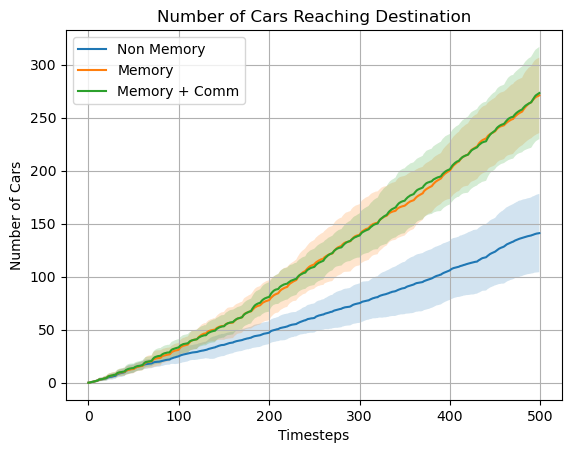

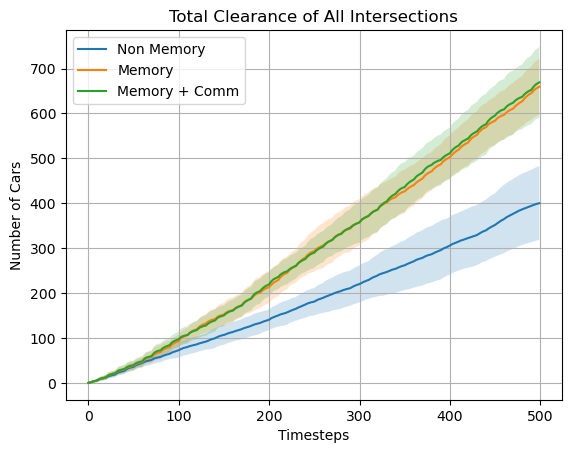

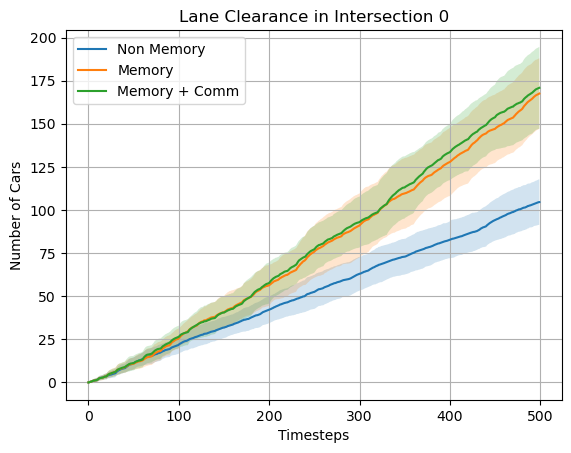

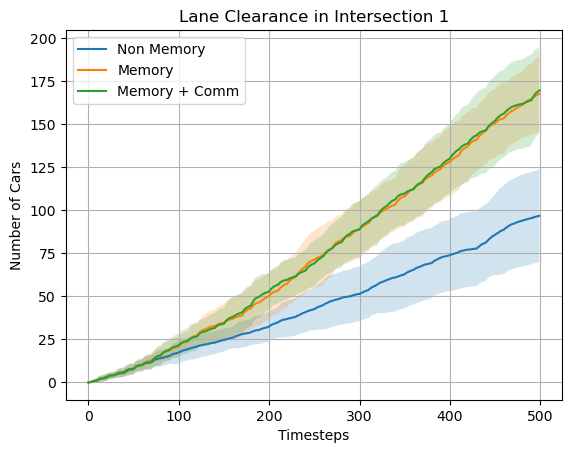

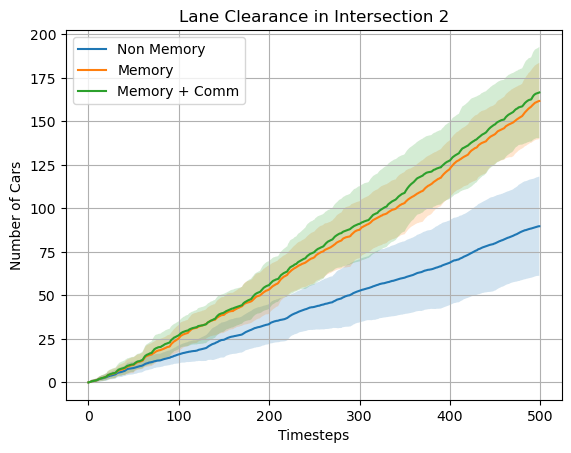

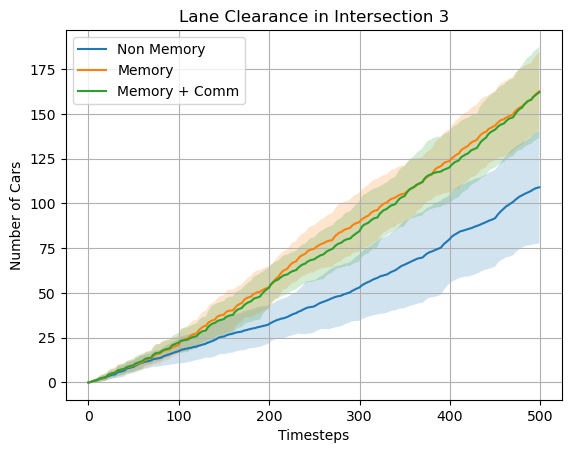

In [110]:
folder_path = '../metrics/run_2_2'
show_results(folder_path)

In [70]:
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_arriving_1_2_mem_False_comm_False.npy'), axis = 0), label = 'Non Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_arriving_1_2_mem_True_comm_False.npy'), axis = 0), label = 'Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_arriving_1_2_mem_True_comm_True.npy'), axis = 0), label = 'Memory + Comm')
# plt.title("Number of Cars Reaching Destination")
# plt.ylabel("Number of Cars")
# plt.xlabel("Timesteps")
# plt.legend()

In [75]:
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_clearance_1_2_mem_False_comm_False.npy'), axis = 0), label = 'Non Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_clearance_1_2_mem_True_comm_False.npy'), axis = 0), label = 'Memory')
# plt.plot(np.mean(np.load('../metrics/run_1_2/total_clearance_1_2_mem_True_comm_True.npy'), axis = 0), label = 'Memory + Comm')
# plt.title("Total Clearance of All Intersections")
# plt.ylabel("Number of Cars")
# plt.xlabel("Timesteps")
# plt.legend()

In [83]:
# non_mem_waiting = np.mean(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_False_comm_False.npy'))
# non_mem_waiting_std = np.std(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_False_comm_False.npy'))

# mem_waiting = np.mean(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_False.npy'))
# mem_waiting_std = np.std(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_False.npy'))

# mem_comm_waiting = np.mean(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_True.npy'))
# mem_comm_waiting_std = np.std(np.load('../metrics/run_1_2/total_waiting_time_1_2_mem_True_comm_True.npy'))

# pd.DataFrame({"Non Memory": [str(round(non_mem_waiting, 2)) + ' +- ' + str(round(non_mem_waiting_std, 2))],
#               "Memory": [str(round(mem_waiting, 2)) + ' +- ' + str(round(mem_waiting_std, 2))],
#               "Memory + Comm": [str(round(mem_comm_waiting, 2)) + ' +- ' + str(round(mem_comm_waiting_std, 2))]})

In [78]:
# with open('../metrics/run_1_2/node_clearance_1_2_mem_False_comm_False.pickle', 'rb') as f:
#     node_clear_non_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_clearance_1_2_mem_True_comm_False.pickle', 'rb') as f:
#     node_clear_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_clearance_1_2_mem_True_comm_True.pickle', 'rb') as f:
#     node_clear_mem_comm = pickle.load(f)

# node_clear_non_mem = {key: np.mean(values, axis = 0) for key, values in node_clear_non_mem.items()}
# node_clear_mem = {key: np.mean(values, axis = 0) for key, values in node_clear_mem.items()}
# node_clear_mem_comm = {key: np.mean(values, axis = 0) for key, values in node_clear_mem_comm.items()}

# for node in node_clear_non_mem.keys():
#     plt.figure()
#     plt.plot(range(len(node_clear_non_mem[node])), node_clear_non_mem[node], label = 'Non Memory')
#     plt.plot(range(len(node_clear_mem[node])), node_clear_mem[node], label = 'Memory')
#     plt.plot(range(len(node_clear_mem_comm[node])), node_clear_mem_comm[node], label = 'Memory + Comm')
#     plt.title(f"Lane Clearance in Intersection {node}")
#     plt.ylabel("Number of Cars")
#     plt.xlabel("Timesteps")
#     plt.legend()

In [86]:
# with open('../metrics/run_1_2/node_waiting_time_1_2_mem_False_comm_False.pickle', 'rb') as f:
#     node_wait_non_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_waiting_time_1_2_mem_True_comm_False.pickle', 'rb') as f:
#     node_wait_mem = pickle.load(f)

# with open('../metrics/run_1_2/node_waiting_time_1_2_mem_True_comm_True.pickle', 'rb') as f:
#     node_wait_mem_comm = pickle.load(f)

# node_wait_non_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_non_mem.items()}
# node_wait_mem = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem.items()}
# node_wait_mem_comm = {key: str(round(np.mean(values, axis = 0), 2)) + ' +- ' + str(round(np.std(values, axis = 0), 2))  for key, values in node_wait_mem_comm.items()}

# pd.DataFrame({"Non Memory": node_wait_non_mem,
#               "Memory": node_wait_mem,
#               "Memory + Comm": node_wait_mem_comm})